In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
data=pd.read_csv('/content/combined_news_djia.csv')
data.head()


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,8/8/2008,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,8/11/2008,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,8/12/2008,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,8/13/2008,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed

In [ ]:
#Data Pre-processing
#Removing the additional html tags from data
data = data.replace('b\"|b\'|\\\\|\\\"', '', regex=True)
data.tail(2)


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1987,6/30/2016,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,Afghan suicide bomber 'kills up to 40' - BBC News,US airstrikes kill at least 250 ISIS fighters ...,Turkish Cop Who Took Down Istanbul Gunman Hail...,Cannabis compounds could treat Alzheimer's by ...,Japan's top court has approved blanket surveil...,CIA Gave Romania Millions to Host Secret Prisons,Groups urge U.N. to suspend Saudi Arabia from ...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...
1988,7/1/2016,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates urge Greenpeace to stop o...,Brazil: Huge spike in number of police killing...,Austria's highest court annuls presidential el...,"Facebook wins privacy case, can track any Belg...",Switzerland denies Muslim girls citizenship af...,China kills millions of innocent meditators fo...,France Cracks Down on Factory Farms - A viral ...,Abbas PLO Faction Calls Killer of 13-Year-Old ...,Taiwanese warship accidentally fires missile t...,"Iran celebrates American Human Rights Week, mo...",U.N. panel moves to curb bias against L.G.B.T....,"The United States has placed Myanmar, Uzbekist...",S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...


In [ ]:
#Data cleaning - Checking for null values
data.isna().sum()


Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [ ]:
data.shape


(1989, 27)

In [ ]:
data.dropna(inplace=True)


In [ ]:
data.shape


(1986, 27)

In [ ]:
combined=data.copy()
combined['Combined']=combined.iloc[:,2:27].apply(lambda row: ''.join(str(row.values)), axis=1)

In [ ]:
train = data[data['Date'] < '2015-01-01']
test = data[data['Date'] > '2014-12-31']

In [ ]:
print("Length of train is",len(train))
print("Length of test is", len(test))


Length of train is 822
Length of test is 1164


In [ ]:
trainheadlines = []
for row in range(0,len(train.index)):
    trainheadlines.append(' '.join(str(x) for x in train.iloc[row,2:27]))
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))

In [ ]:
train = combined[combined['Date'] < '2015-01-01']
test= combined[combined['Date'] > '2014-12-31']


In [ ]:
non_decrease = train[train['Label']==1]
decrease = train[train['Label']==0]
print(len(non_decrease)/len(train))


0.5304136253041363


In [ ]:
non_decrease_test = test[test['Label']==1]
decrease_test = test[test['Label']==0]
print(len(non_decrease_test)/len(test))

0.5378006872852233


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS
import re
import nltk
from nltk.corpus import stopwords
def to_words(content): ### function to clean the words
    letters_only = re.sub("[^a-zA-Z]", " ", content) ### get only letters
    words = letters_only.lower().split()             ### lowercase       
    stops = set(stopwords.words("english"))         ### remove stopwords such as 'the', 'and' etc.         
    meaningful_words = [w for w in words if not w in stops] ### get meaningful words
    return( " ".join( meaningful_words )) 

In [ ]:
non_decrease_word=[]
decrease_word=[]
for each in non_decrease['Combined']:
    non_decrease_word.append(to_words(each))

for each in decrease['Combined']:
    decrease_word.append(to_words(each))

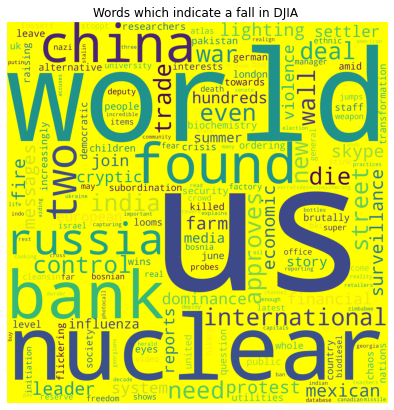

In [ ]:
wordcloud1 = WordCloud(background_color='yellow',
                      width=2500,
                      height=2500
                     ).generate(decrease_word[1])
plt.figure(1,figsize=(7,7))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate a fall in DJIA ")
plt.show()


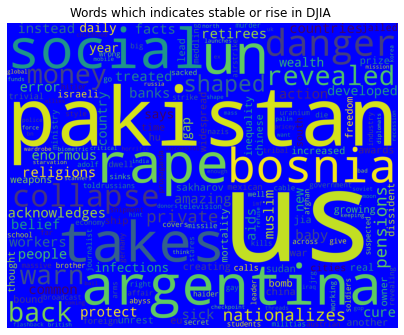

In [ ]:
wordcloud2 = WordCloud(background_color='blue',
                      width=3200,
                      height=2500
                     ).generate(non_decrease_word[3])
plt.figure(1,figsize=(7,7))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicates stable or rise in DJIA ")
plt.show()

In [ ]:
#bag of words model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier


In [ ]:
countvectorizer=CountVectorizer(ngram_range=(3,3))
train_data1=countvectorizer.fit_transform(trainheadlines)


In [ ]:
#Random forest classifier
randomForestClassifier = RandomForestClassifier(n_estimators=200,criterion='entropy')
randomForestClassifier.fit(train_data1,train['Label'])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Transforming test data

test_transform=[]

for i in range(len(test.index)):
    test_transform.append(' '.join(str(j) for j in test.iloc[i,2:]))
test_dataset=countvectorizer.transform(test_transform)
prediction=randomForestClassifier.predict(test_dataset)


In [ ]:
#Importing libaries from sklearn package to check the performance of RF model
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [ ]:
#Confusion matrix
matrix=confusion_matrix(test['Label'],prediction)
print('Confusion matrix is : \n', matrix)
#Accuracy score
score=accuracy_score(test['Label'],prediction)
print('Accuracy score is : \n',score)
#Report
report=classification_report(test['Label'],prediction)
print('Classification report : \n',report)


Confusion matrix is : 
 [[  1 537]
 [  0 626]]
Accuracy score is : 
 0.538659793814433
Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       538
           1       0.54      1.00      0.70       626

    accuracy                           0.54      1164
   macro avg       0.77      0.50      0.35      1164
weighted avg       0.75      0.54      0.38      1164

